# 서울시 업무추진비(2016~2018)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

# 폰트설정
plt.rcParams['font.family'] = 'NanumBarunGothic'
print (plt.rcParams['font.family'] )

['NanumBarunGothic']


In [2]:
df = pd.read_csv('data/seoul_city_hall_expense.csv')
df.shape

(159600, 20)

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,exec_yr,exec_month,expense_budget,expense_execution,category,exec_dt,exec_loc,target_nm,payment_method,exec_amount
0,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-30 12:27,매일한우타운식당(광시면 예당로길),시정 청년정책 관련 업무협의 간담회,시장 등 12명,카드,250000
1,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-30 08:28,청암회관(예산군 덕산면),"시정 충남, 전북 현장 방문 관련 업무협의",시장 등 6명,카드,72000
2,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-29 20:06,태원(서구 문정로),시정 지방자치단체 협력 관련 업무협의,시장 등 3명,카드,107500
3,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-29 12:33,고릴라(세종 절재로),시정 교류 및 협력 관련 업무협의,시장 등 6명,카드,190000
4,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-28 00:00,서울시청매점,방문민원 등 접대용품 구입,NaN,카드,485000


In [4]:
# 컬럼 이름에 누락이 있다. 앞에 2개가 빈 이름으로 들어가 있는데 누락된 컬럼을 채워준다.
len(df.columns)

20

In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'nid', 'title', 'url', 'dept_nm_lvl_1',
       'dept_nm_lvl_2', 'dept_nm_lvl_3', 'dept_nm_lvl_4', 'dept_nm_lvl_5',
       'exec_yr', 'exec_month', 'expense_budget', 'expense_execution',
       'category', 'exec_dt', 'exec_loc', 'target_nm', 'payment_method',
       'exec_amount'],
      dtype='object')

* 사이트에 있는 이름과 동일한 이름으로 변경해 준다.
* 연번	구분	부서명	집행일시	집행장소	집행목적	대상인원	결제방법	집행금액

In [6]:
df.columns = ['nid', 'title', 'url', 'dept_nm_lvl_1',
       'dept_nm_lvl_2', 'dept_nm_lvl_3', 'dept_nm_lvl_4', 'dept_nm_lvl_5',
       '집행연', '집행월', 'expense_budget', 'expense_execution',
       '집행목적', '부서명', '집행일시', 'exec_loc', 'desc', '대상인원', '결제방법',
       '집행금액']

In [7]:
df.head()

,nid,title,url,dept_nm_lvl_1,dept_nm_lvl_2,dept_nm_lvl_3,dept_nm_lvl_4,dept_nm_lvl_5,집행연,집행월,expense_budget,expense_execution,집행목적,부서명,집행일시,exec_loc,desc,대상인원,결제방법,집행금액
0,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-30 12:27,매일한우타운식당(광시면 예당로길),시정 청년정책 관련 업무협의 간담회,시장 등 12명,카드,250000
1,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-30 08:28,청암회관(예산군 덕산면),"시정 충남, 전북 현장 방문 관련 업무협의",시장 등 6명,카드,72000
2,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-29 20:06,태원(서구 문정로),시정 지방자치단체 협력 관련 업무협의,시장 등 3명,카드,107500
3,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-29 12:33,고릴라(세종 절재로),시정 교류 및 협력 관련 업무협의,시장 등 6명,카드,190000
4,7832320,2016년 1월 서울특별시장 업무추진비 집행내역 공표,http://opengov.seoul.go.kr/public/7832320,서울시본청,서울특별시장,NaN,NaN,NaN,2016,1,380200000.0,13551000.0,시정 관련 간담회 등,행정국 총무과,2016-01-28 00:00,서울시청매점,방문민원 등 접대용품 구입,NaN,카드,485000


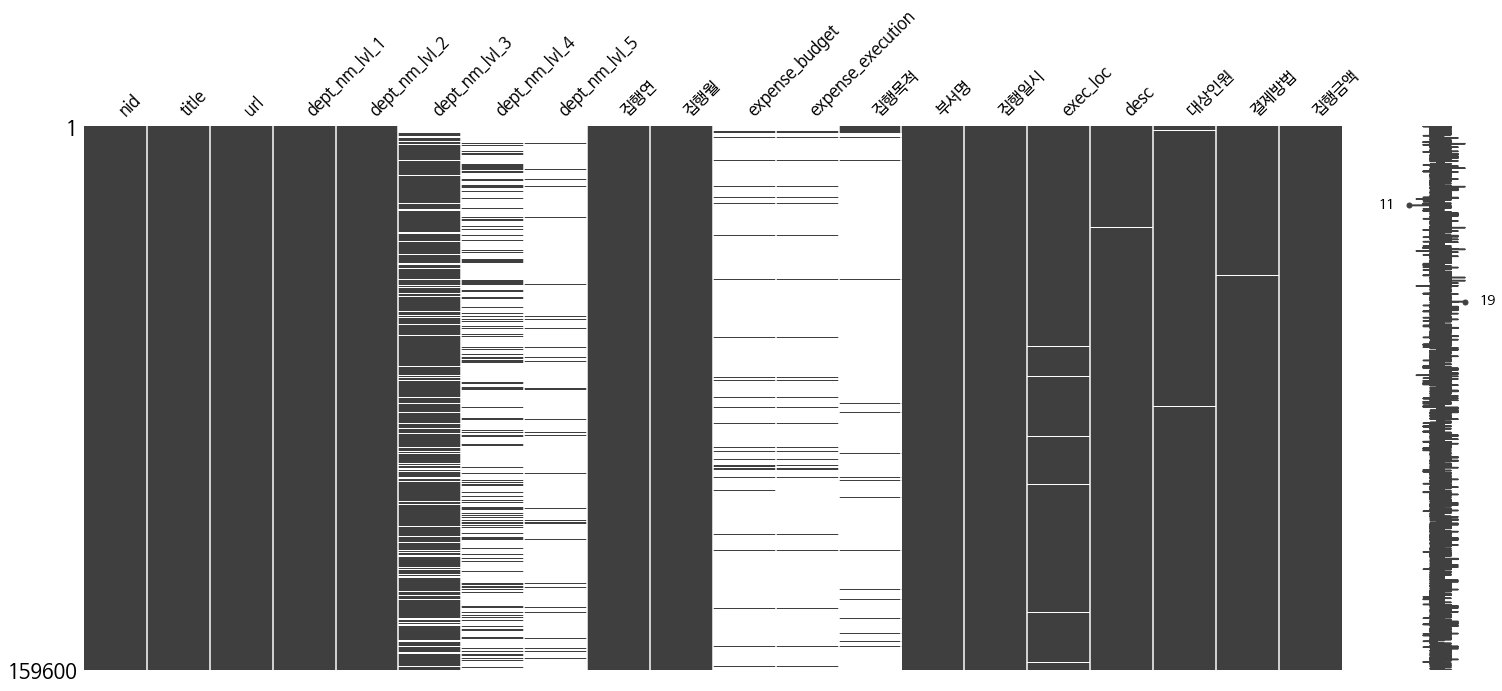

In [8]:
import missingno as msno

msno.matrix(df)

In [9]:
df["dept_nm_lvl_1"].value_counts()

서울시본청          98699
사업소            36826
소방재난본부(소방서)    16631
의회사무처           7444
Name: dept_nm_lvl_1, dtype: int64

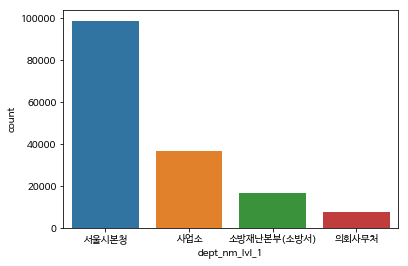

In [10]:
sns.countplot(data=df, x="dept_nm_lvl_1")

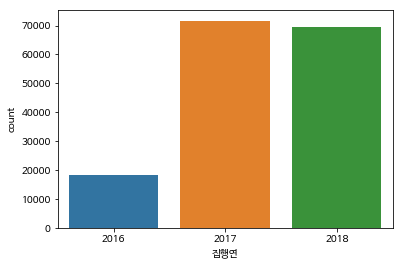

In [11]:
sns.countplot(data=df, x="집행연")

In [12]:
df["집행연월"] =  df["집행연"].astype(str) + "-" + df["집행월"].astype(str)

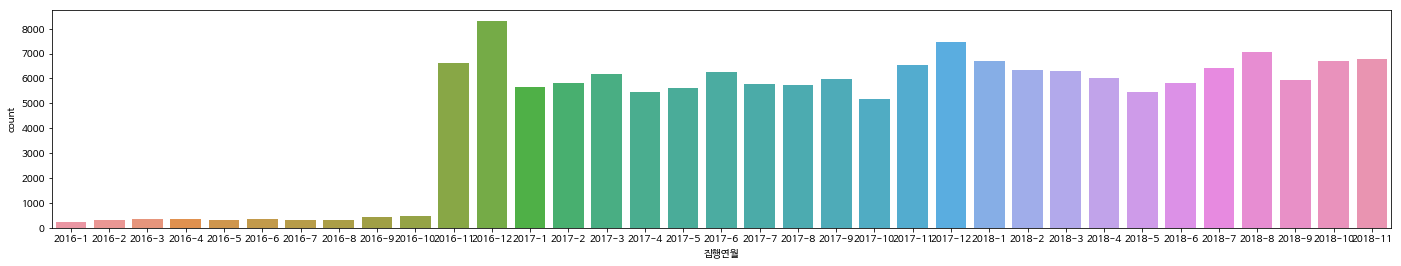

In [13]:
plt.figure(figsize=(24,4))
sns.countplot(data=df, x="집행연월")